# Training YOLOv3 Object Detector with Custom Dataset

## Cloning and Building Darknet


In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14500, done.
remote: Total 14500 (delta 0), reused 0 (delta 0), pack-reused 14500
Receiving objects: 100% (14500/14500), 13.15 MiB | 22.71 MiB/s, done.
Resolving deltas: 100% (9861/9861), done.


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b055cb77-8452-b2d0-11c7-f03329177871)


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-05 10:14:44--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       91%[=================>  ] 216.71M   113KB/s    eta 3m 14s 

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

 WOW this is magic! Make sure to click this link to be blessed with lots of YOLOv3 luck!!!
 [https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1)

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

## Uploading Local or Google Drive Files to Use

In [ ]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

In [ ]:
# make sure you are in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../s2.jpg
imShow('predictions.jpg')

## Connect with Google Drive


In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 all.rar
 ATTf
 colab
'Colab Notebooks'
 Coodd
 Coursera
'Data Explained ModelTrainingOnColab_final_faster_rcnn.ipynb'
'Data science Interview Questions'
'Getting started.pdf'
'git file'
 limoncv02.pdf
'My Drive'
 object_detection
 panda-model
 RESUME
 sc.txt
 Templates
 TensorFlow-2.x-YOLOv3
 trff
 YOLOv3-Cloud-Tutorial
 YOLOv4-Cloud-Tutorial
 YOLOv5-pytorch


In [8]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

NameError: ignored

## Download Files to Local Machine or Google Drive from Cloud VM

In [ ]:
# LOCAL MACHINE DOWNLOAD
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD

!cp predictions.jpg /mydrive/images/detection1.jpg

## Training YoloV3

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


## Collecting and Labeling the Custom Dataset
Write something

### Method 2: Manually Labeling Images with Annotation Tool
Where i find the dataset and how to label them

# Step 2: Moving Your Custom Dataset Into Your Cloud VM
So now that you have your dataset properly formatted to be used for training we need to move it into this cloud VM so that when it comes the time we can actually use it for training.

I recommend renaming the folder with your images and text files on your local machine to be called '**obj**' and then creating a .zip folder of the 'obj' folder. Then I recommend uploading the zip to your Google Drive. So you should now have obj.zip someplace in your Google drive. 

This will **greatly reduce** the time it takes to transfer our dataset into our cloud VM.

Now we can copy in the zip and unzip it on your cloud VM.

In [9]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/YOLOv4-Cloud-Tutorial/yolov4

 backup		     obj.data	 test.zip		    yolov4-obj.cfg.gdoc
 generate_test.py    obj.names	'yolov4-obj (1).cfg.gdoc'
 generate_train.py   obj.zip	 yolov4-obj.cfg


In [10]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/YOLOv4-Cloud-Tutorial/yolov4/obj.zip ../
!cp /mydrive/YOLOv4-Cloud-Tutorial/yolov4/test.zip ../

In [11]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/Dipto_773.txt  
  inflating: data/obj/Dipto_774.jpg  
  inflating: data/obj/Dipto_774.txt  
  inflating: data/obj/Dipto_775.jpg  
  inflating: data/obj/Dipto_775.txt  
  inflating: data/obj/Dipto_776.jpg  
  inflating: data/obj/Dipto_776.txt  
  inflating: data/obj/Dipto_777.jpg  
  inflating: data/obj/Dipto_777.txt  
  inflating: data/obj/Dipto_778.jpg  
  inflating: data/obj/Dipto_778.txt  
  inflating: data/obj/Dipto_779.jpg  
  inflating: data/obj/Dipto_779.txt  
  inflating: data/obj/Dipto_780.jpg  
  inflating: data/obj/Dipto_780.txt  
  inflating: data/obj/Dipto_781.jpg  
  inflating: data/obj/Dipto_781.txt  
  inflating: data/obj/Dipto_782.jpg  
  inflating: data/obj/Dipto_782.txt  
  inflating: data/obj/Dipto_783.jpg  
  inflating: data/obj/Dipto_783.txt  
  inflating: data/obj/Dipto_784.jpg  
  inflating: data/obj/Dipto_784.txt  
  inflating: data/obj/Dipto_785.jpg  
  inflating: data/obj/Dipto_785.txt  

## Configuring cfg File for Training

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/YOLOv3-Cloud-Tutorial/yolov3/yolov3_custom.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
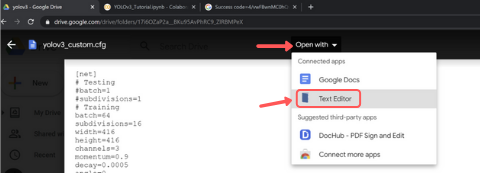

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** I set my **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [12]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/YOLOv3-Cloud-Tutorial/yolov3/yolov3_custom.cfg ./cfg 

## ii) obj.names and obj.data 
save our object name and file path

Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

![image.png]

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

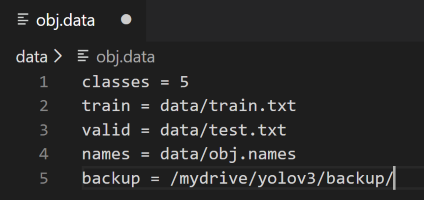



In [13]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/YOLOv3-Cloud-Tutorial/yolov3/obj.names ./data
!cp /mydrive/YOLOv3-Cloud-Tutorial/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

In [14]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/YOLOv3-Cloud-Tutorial/yolov3/generate_train.py ./
!cp /mydrive/YOLOv3-Cloud-Tutorial/yolov3/generate_test.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [15]:
!python generate_train.py
!python generate_test.py

In [16]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
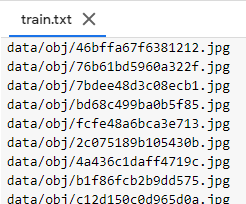

It will contain one line for each training image path.

## Download pre-trained weights for the convolutional layers.

In [17]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-11-29 18:33:35--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-11-29 18:33:35--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  2.59MB/s    in 59s     

2020-11-29 18:34:34 (2.63 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```

In [ ]:
# train your custom detector
%%capture
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
# kick off training from where it last saved
%%capture
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/YOLOv3-Cloud-Tutorial/yolov3/backup/yolov3_custom_last.weights -dont_show

## Run Your Custom Object Detector!!!

In [ ]:
# No Need to RUN
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
# Check how good your model is

!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/YOLOv3-Cloud-Tutorial/yolov3/backup/yolov3_custom_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

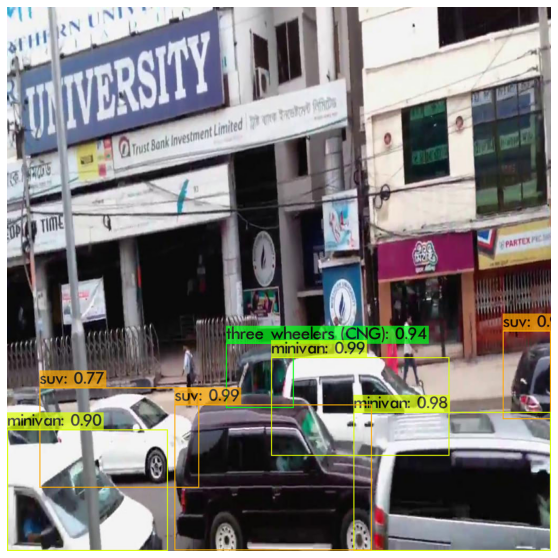

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/YOLOv3-Cloud-Tutorial/yolov3/backup/yolov3_custom_last.weights /content/6.jpg -thresh 0.3
imShow('predictions.jpg')